In [8]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , RobustScaler
from scipy.stats import boxcox,skew
from sklearn.linear_model import LogisticRegression ,LogisticRegressionCV
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.naive_bayes import BernoulliNB

warnings.filterwarnings("ignore")
df = pd.read_csv("/Users/hajiaga/Downloads/creditcard.csv")


In [9]:
#Code which is fully written me and mentor

def get_outliers(data , column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - IQR*1.5
    upper_bound = Q3 + IQR*1.5
    return [data.loc[(data[column].astype(float) < lower_bound) | (data[column].astype(float) > upper_bound)].shape[0] , lower_bound ,upper_bound]
lowers , uppers = [] , []
for col in df.columns:
    lowers.append(get_outliers(df,col)[1])
    uppers.append(get_outliers(df,col)[2])
print(lowers)
print(uppers)
np.sum((df>lowers) & ( df<uppers),axis=1)>8
df = df[np.sum((df>lowers) & ( df<uppers),axis=1)>23]
df.info()
df["Class"]

[-73477.0, -4.274396001792603, -2.7019605905224315, -3.7667054090861836, -3.236612225031064, -2.646882336821933, -2.51858636568538, -2.240843806907704, -1.0125931529838397, -2.503452471089882, -2.0194494839425694, -3.015625599764853, -1.941285763020238, -2.6151056869463822, -1.803659804964707, -2.430441907369377, -1.955036385495261, -1.8088832582431966, -1.9983346169934264, -1.8291713305051371, -0.7288646731770594, -0.8505531720141558, -2.148706384652634, -0.6260789583212862, -1.5457552412760254, -1.318935979464254, -1.178888075273932, -0.3136665027898834, -0.24981941467918245, -101.7475, 0.0]
[266999.0, 4.669664311280146, 2.90713454829761, 3.9035361133965982, 3.1313133981683787, 2.5672117056694685, 2.148855653580996, 2.2572040007487804, 1.1313092708678223, 2.457493931105559, 1.9379472025887527, 2.9927248115734812, 2.1539523105259604, 2.629071347271788, 1.8712356417278626, 2.496378434529079, 2.010295931257707, 1.7248099271865331, 2.0002915652156013, 1.8318217675233686, 0.65018414949710

0         0
1         0
2         0
3         0
4         0
         ..
284801    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 274329, dtype: int64

In [10]:
def replace_outliers_with_bounds(data):
    for column in data.columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if column != "Class":
            data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
            data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    return data
df = replace_outliers_with_bounds(df)

In [11]:
# for col in df.columns:
#     fig , (bfr , aft) = plt.subplots(nrows=1,ncols=2,figsize=(15,3))
#     sns.histplot(df[col] , ax=bfr)
#     sns.histplot(df[col].apply(np.log1p) , ax=aft)
#     bfr.set(title= col)
#     aft.set(title="Buda sonraki")
#     plt.show()


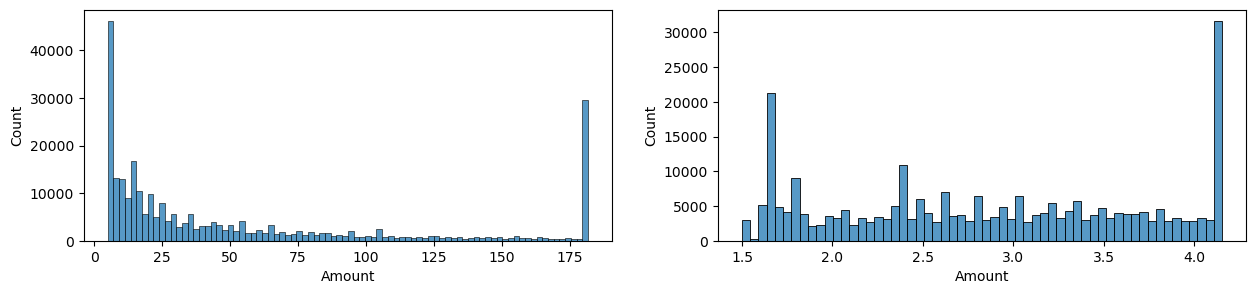

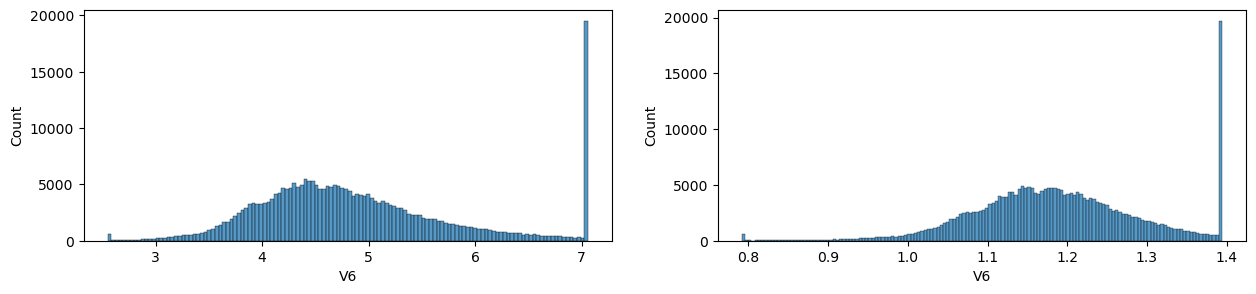

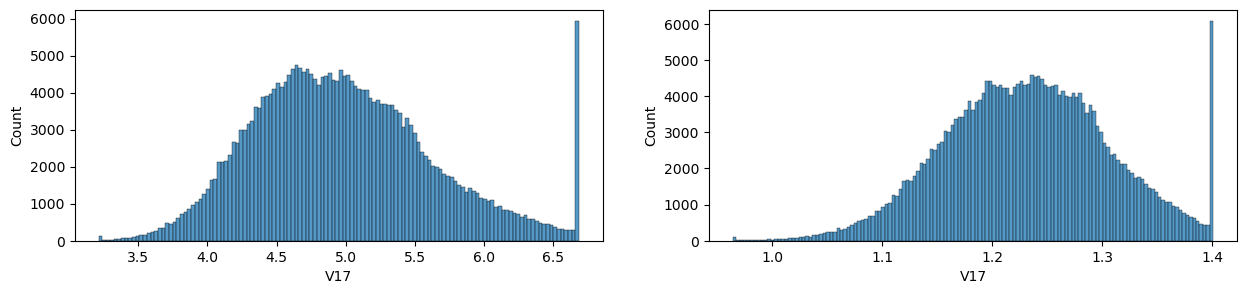

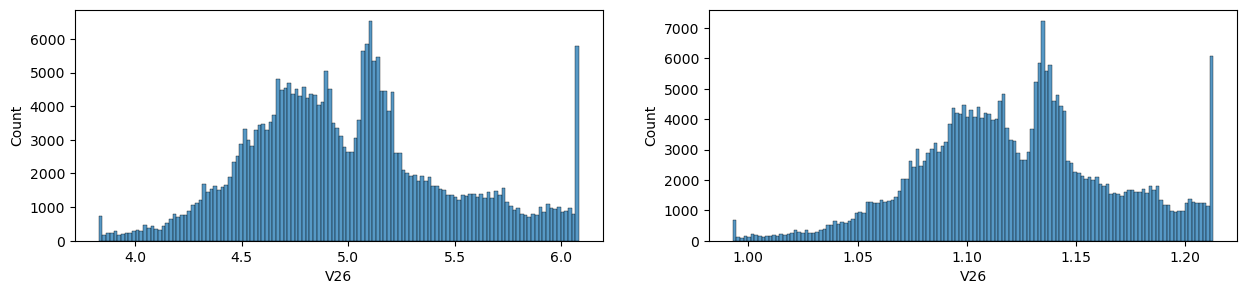

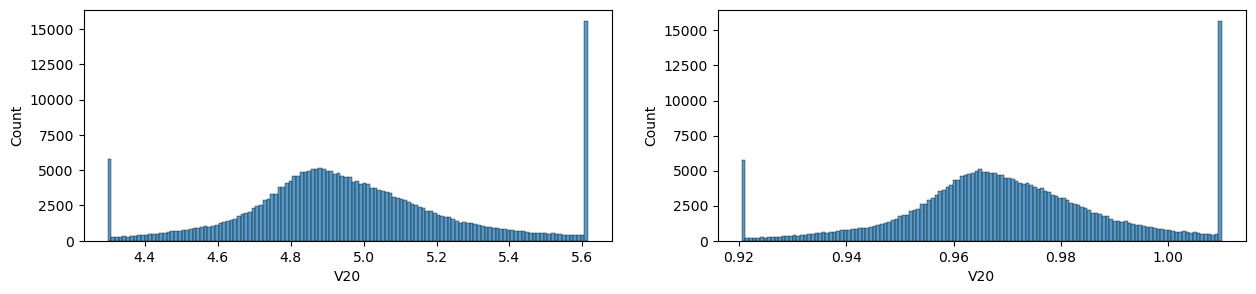

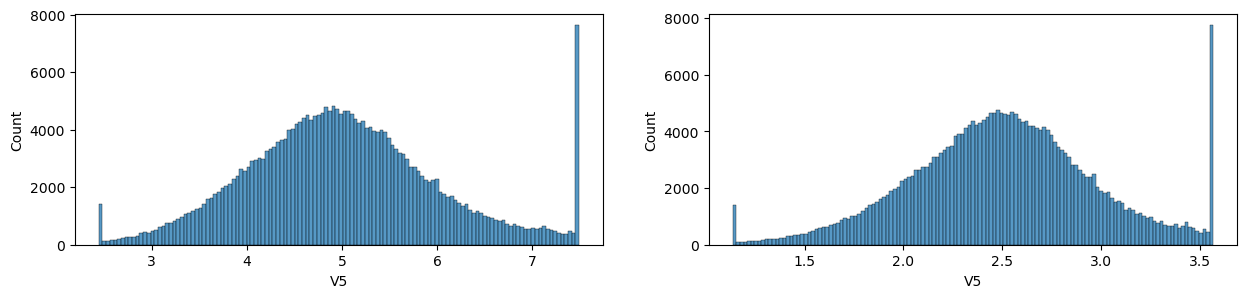

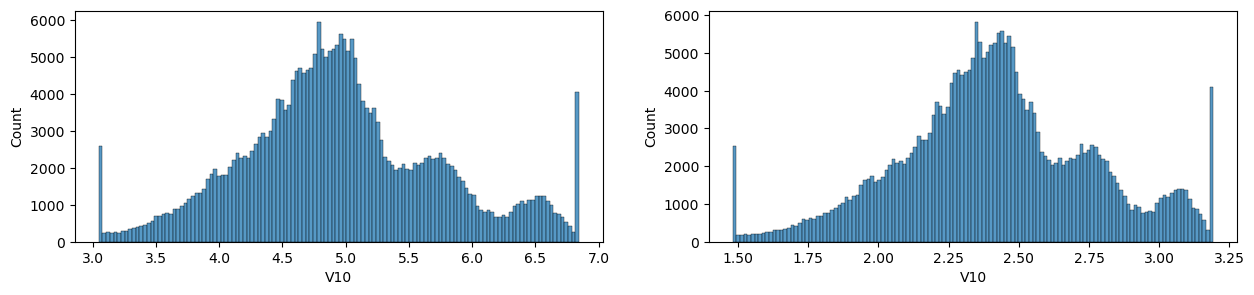

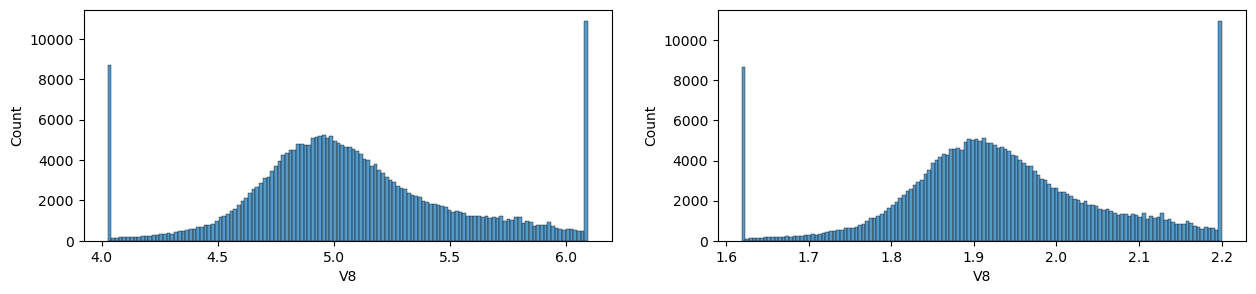

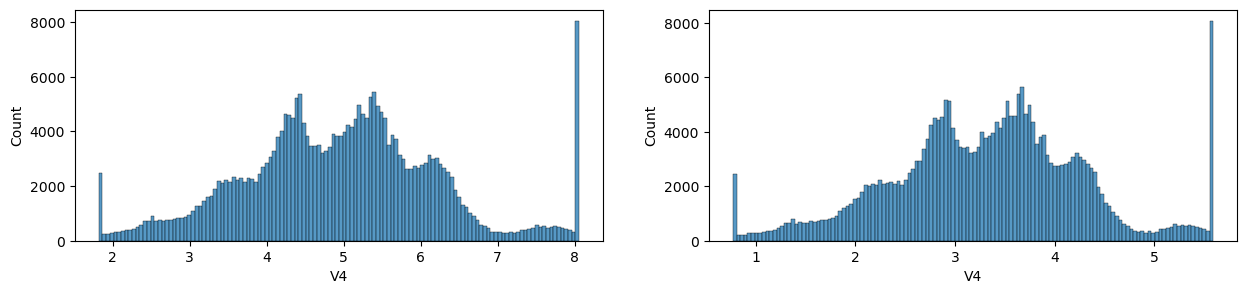

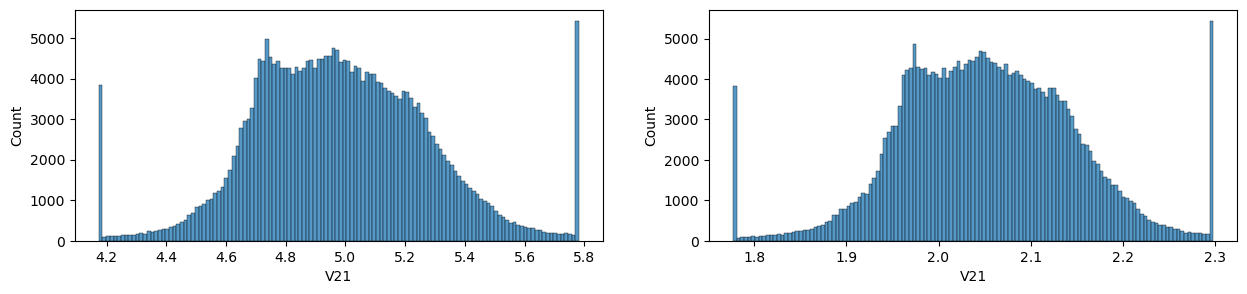

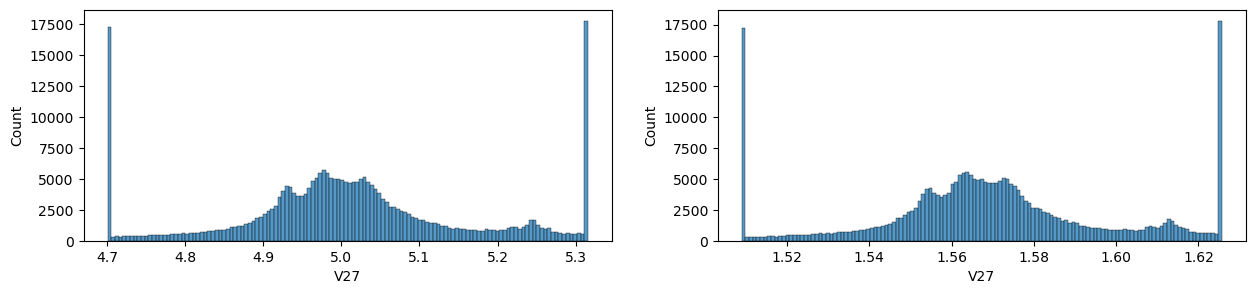

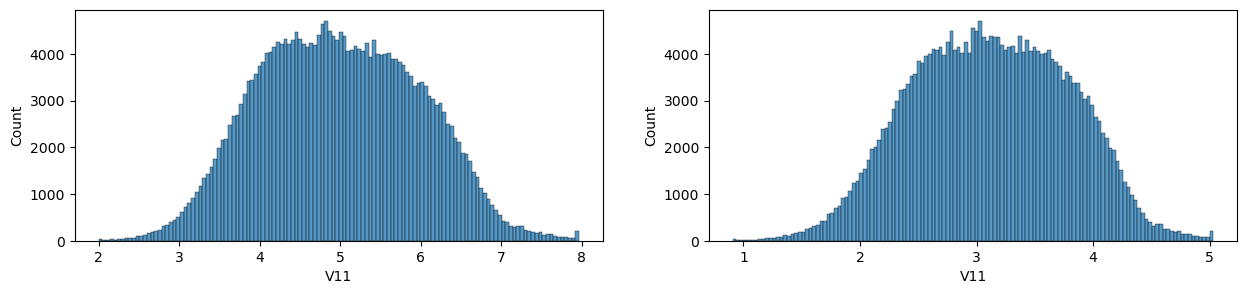

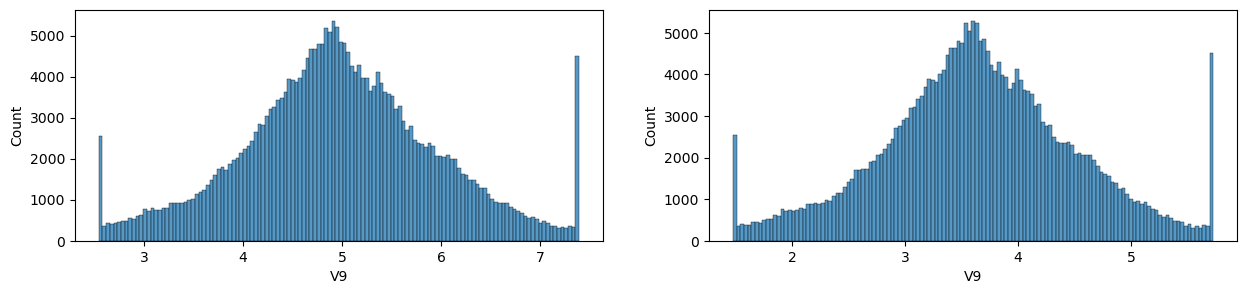

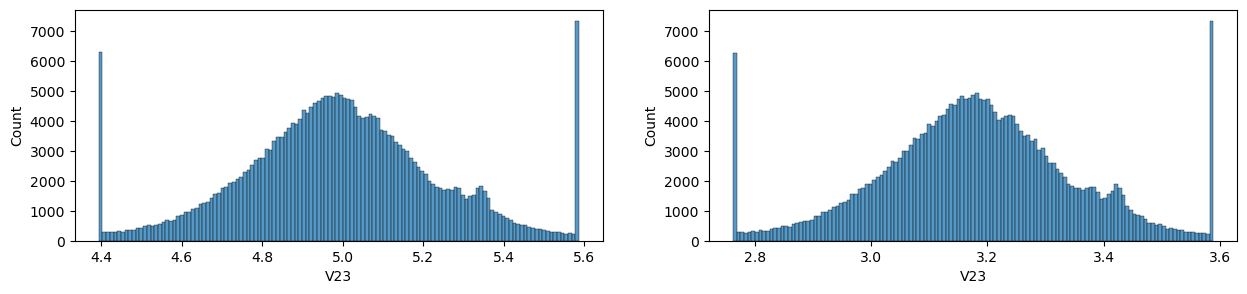

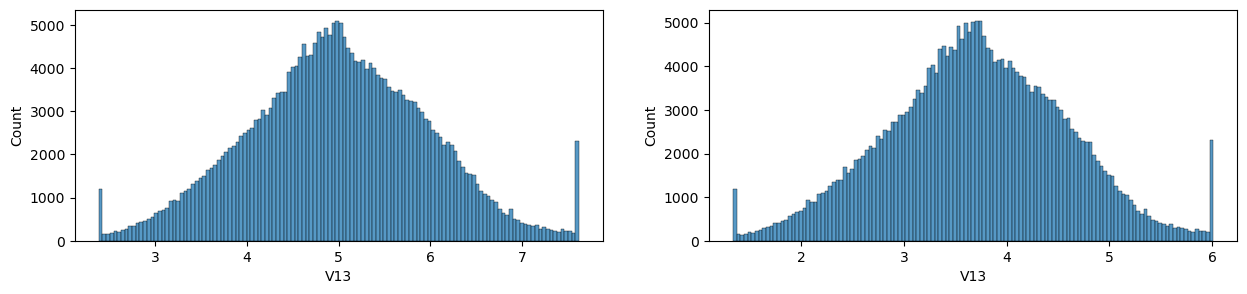

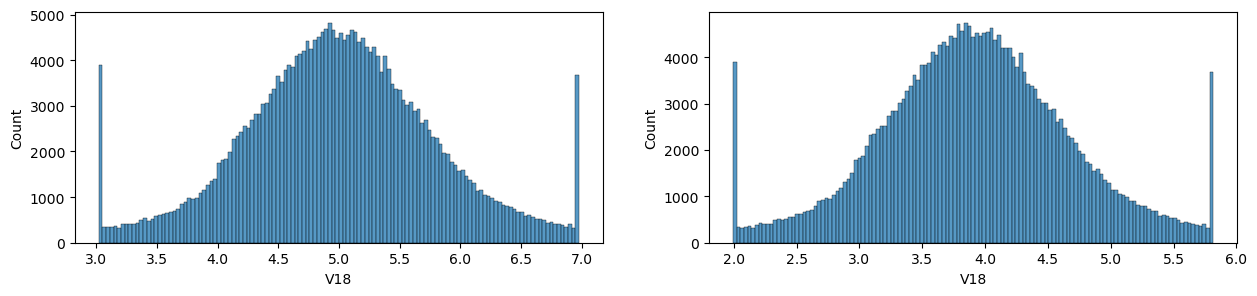

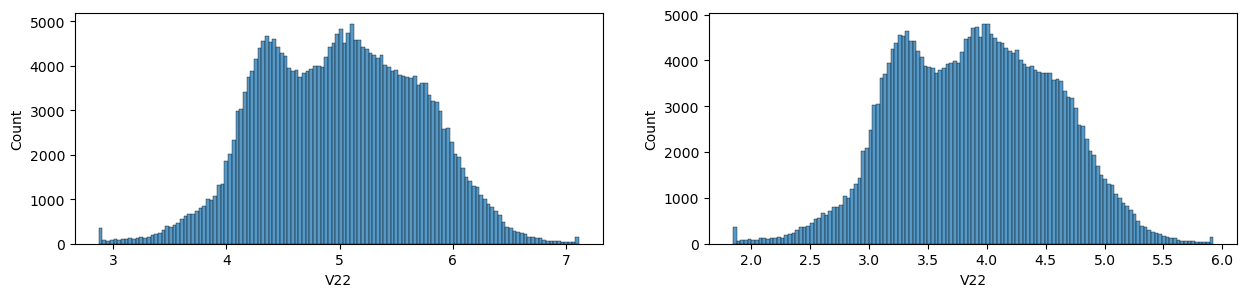

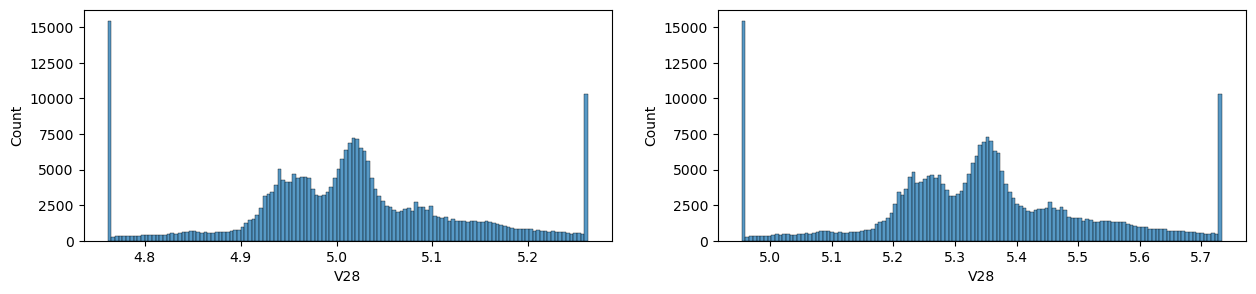

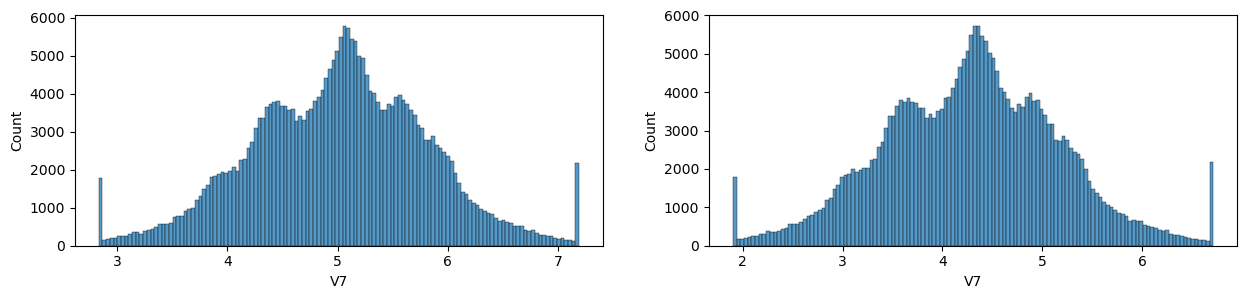

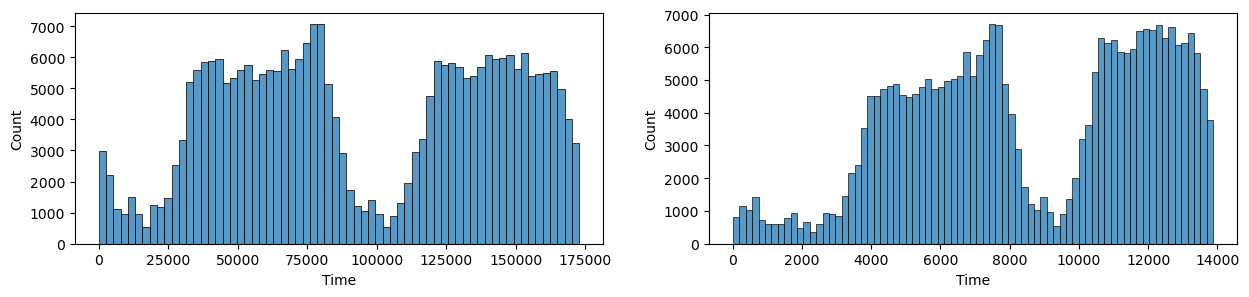

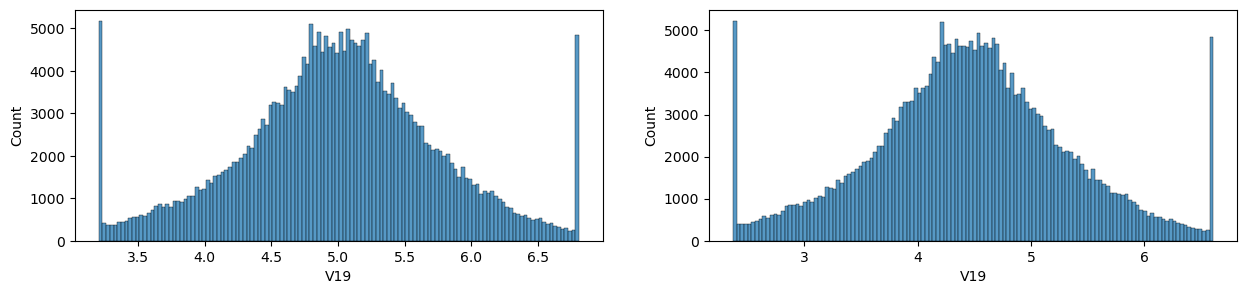

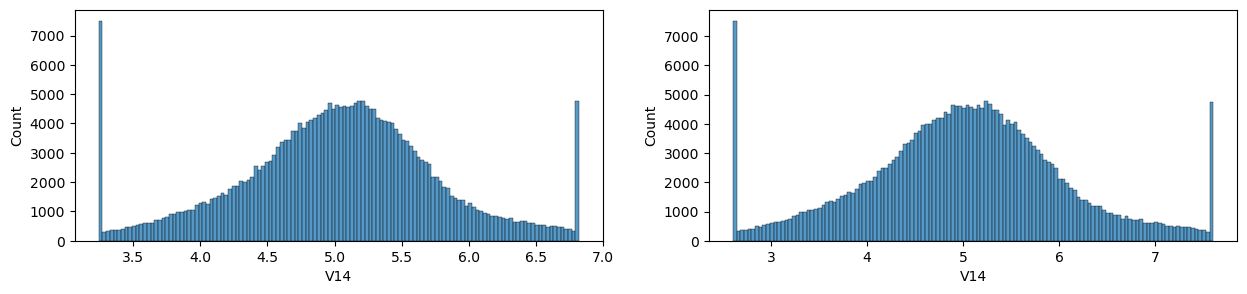

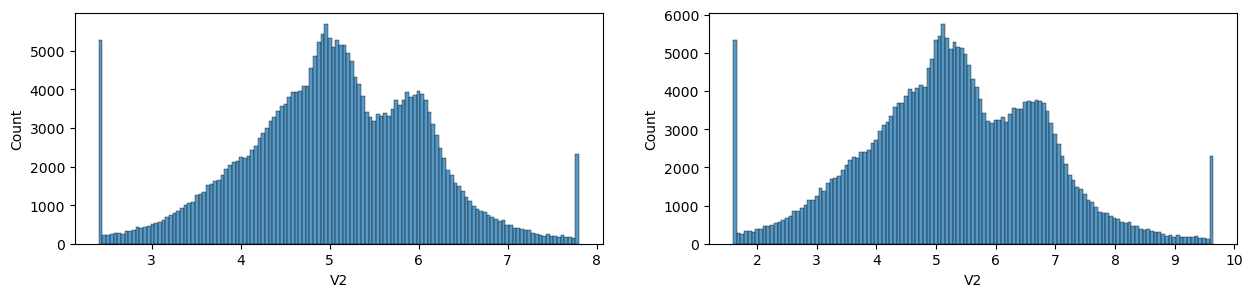

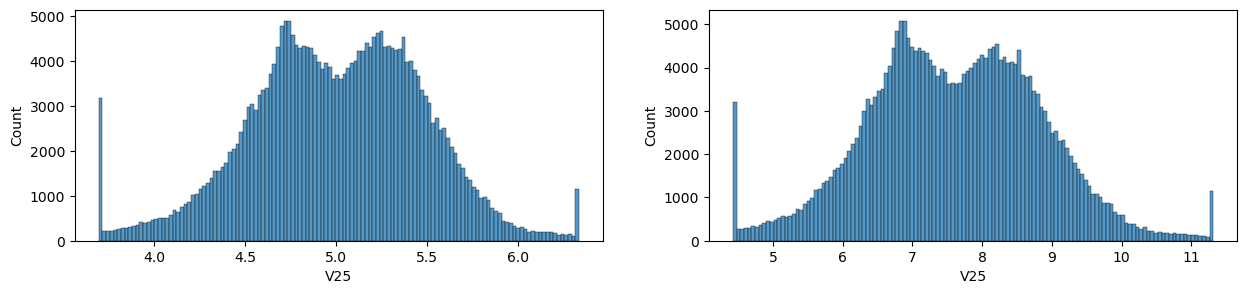

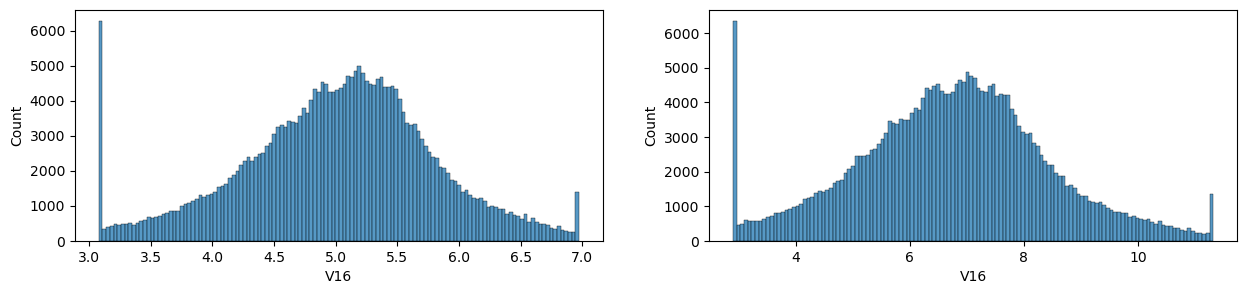

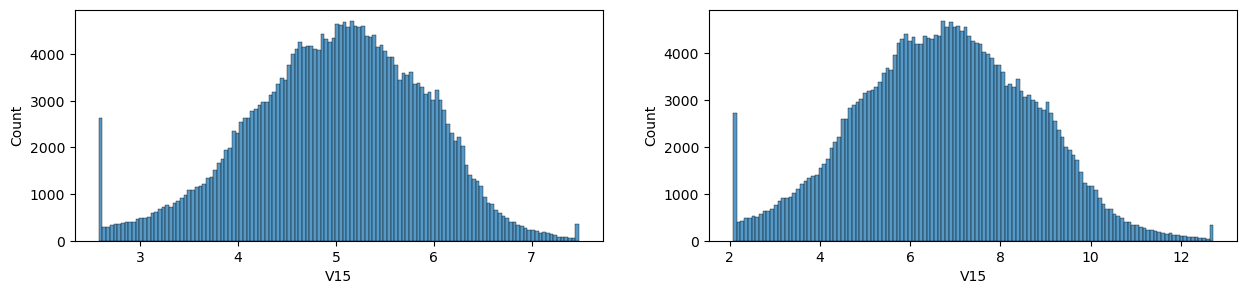

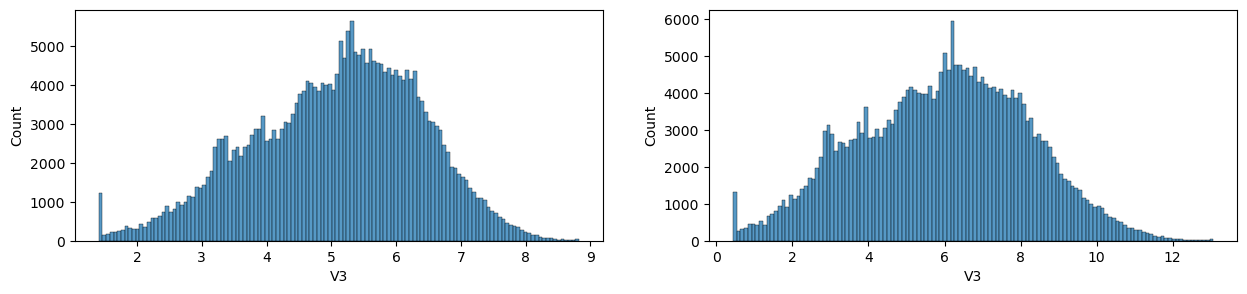

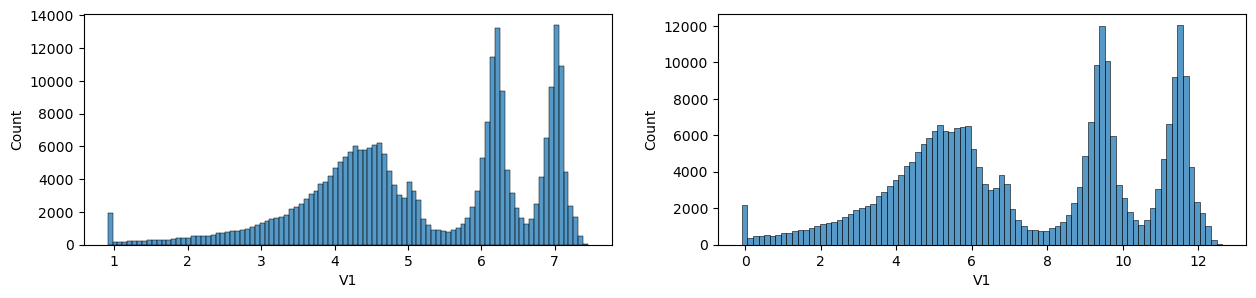

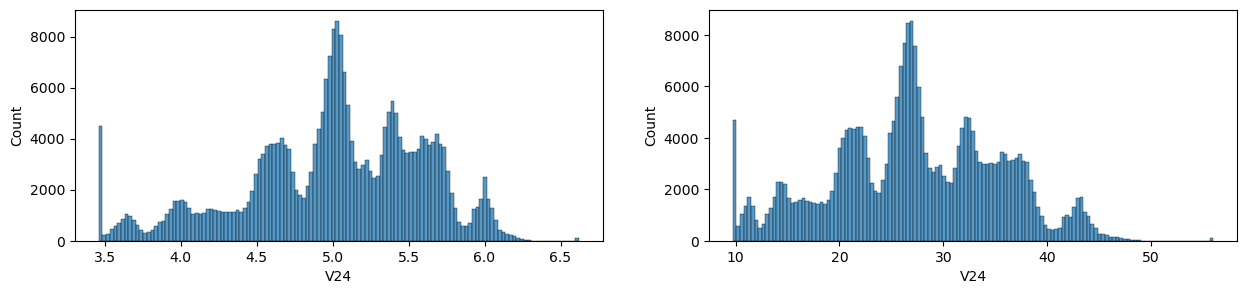

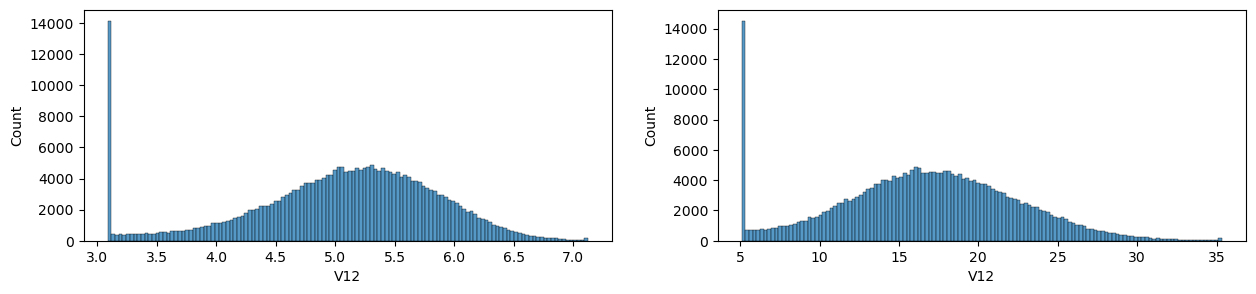

Index(['Class', 'Amount', 'V6', 'V17', 'V26', 'V20', 'V5', 'V10', 'V8', 'V4',
       'V21', 'V27', 'V11', 'V9', 'V23', 'V13', 'V18', 'V22', 'V28', 'V7',
       'Time', 'V19', 'V14', 'V2', 'V25', 'V16', 'V15', 'V3', 'V1', 'V24',
       'V12'],
      dtype='object')


In [12]:
num_cols = df.dtypes[df.dtypes != "object"].index
skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})

skewed_feats =skewness[skewness>0.70].index
for i in skewed_feats:
    if i != "Class":
        # print(np.min(df[i]),i)
        df[i] +=5
        fig , (bfr,aft) = plt.subplots(ncols=2,nrows=1,figsize = (15,3))
        sns.histplot(df[i],ax=bfr)
        df[i] , lam = boxcox(df[i])
        sns.histplot(df[i],ax=aft)
        plt.show()
        bfr.set(title= i)
        aft.set(title="Buda sonraki")

df.select_dtypes(include="O").columns
print(skewed_feats)

In [13]:
#model qurmaq
#logistic regression but not softmax because it is binary classification
X_tr , X_te , Y_tr , Y_te  = train_test_split(df.drop('Class', axis=1), df['Class'], test_size=0.2, random_state=42, shuffle=True)
pipelinelog = make_pipeline(StandardScaler(),LogisticRegression(random_state=42))

pipelinelog.fit(X_tr,Y_tr)

print(r2_score(Y_tr,pipelinelog.predict(X_tr)))
print(r2_score(Y_te,pipelinelog.predict(X_te)))

"""

0.041352159690537516
0.10495320475235947

"""

0.041352159690537516
0.10495320475235947


'\n0.041352159690537516\n0.10495320475235947\n'

In [14]:
#Naive Bayes Bernoulli cunki Binarydi
#As you can see Bernoulli is not good for our data so we will stick to the logistic regression

pipelinebay = Pipeline(steps=[('Scaler' ,StandardScaler()), ('model',BernoulliNB())])
params = {'model__alpha':[0.1,0.5,1,5,10]}
clf = GridSearchCV(pipelinebay, param_grid=params, cv=5, refit=True)
clf.fit(X_tr, Y_tr)

print(r2_score(Y_tr, clf.predict(X_tr)))
print(r2_score(Y_te, clf.predict(X_te)))


"""
-0.00032818119248245736
-0.0003464182179511166
"""

-0.00032818119248245736
-0.0003464182179511166


'\n-0.00032818119248245736\n-0.0003464182179511166\n'